In [67]:
import dcase2020_task2

from pymongo import MongoClient
import numpy as np

INVERSE_CLASS_MAP = {
    0: 'fan',
    1: 'pump',
    2: 'slider',
    3: 'ToyCar',
    4: 'ToyConveyor',
    5: 'valve'
}

baseline_auc = {
    0: {0: 0.5441, 2: 0.7340, 4: 0.6161, 6: 0.7392},
    1: {0: 0.6715, 2: 0.6153, 4: 0.8833, 6: 0.7455},
    2: {0: 0.9619, 2: 0.7897, 4: 0.9430, 6: 0.6959},
    3: {1: 0.8136, 2: 0.8597, 3: 0.6330, 4: 0.8445},
    4: {1: 0.7807, 2: 0.6416, 3: 0.7535},
    5: {0: 0.6876, 2: 0.6818, 4: 0.7430, 6: 0.5390}
}

baseline_pauc = {
    0: {0: 0.4937, 2: 0.5481, 4: 0.5326, 6: 0.5235},
    1: {0: 0.5674, 2: 0.5810, 4: 0.6710, 6: 0.5802},
    2: {0: 0.8144, 2: 0.6368, 4: 0.7198, 6: 0.4902},
    3: {1: 0.6840, 2: 0.7772, 3: 0.5521, 4: 0.6897},
    4: {1: 0.6425, 2: 0.5601, 3: 0.6103},
    5: {0: 0.5170, 2: 0.5183, 4: 0.5197, 6: 0.4843}
}

In [2]:
client = MongoClient('mongodb://student2.cp.jku.at:27017/')

In [3]:
db = client.dcase2020_task2
# db.runs.find_one()

In [4]:
db.list_collection_names()

['fs.chunks',
 'omniboard.settings',
 'omniboard.metric.columns',
 'omniboard.custom.columns',
 'fs.files',
 'runs',
 'metrics']

In [59]:
experiments = []
for experiment in db.runs.find({"experiment.name": "dcase2020_task2_baseline"}):
    experiments.append([
        experiment['config']['machine_type'], 
        experiment['config']['machine_id'], 
        experiment['result']['auroc_mean'],
        experiment['result']['pauroc_mean'],
        "{} {}".format(
            experiment['config'].get('normalize', True), 
            experiment['config'].get('normalize_raw', True)
        )
    ])

In [60]:
import pandas as pd

experiments_ = pd.DataFrame(experiments)
gb = experiments_.groupby(0)
by_machines_type = [gb.get_group(x) for x in gb.groups]

groups = []
for machine_type in by_machines_type:
    gb = machine_type.groupby(1)
    groups += [gb.get_group(x) for x in gb.groups]
    

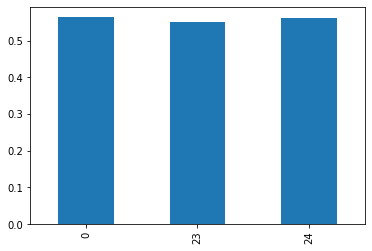

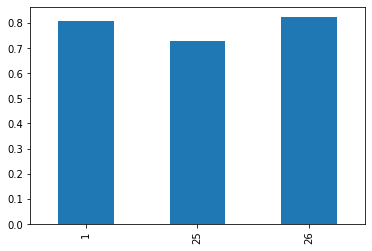

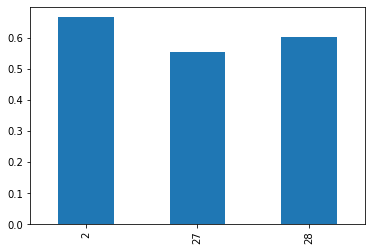

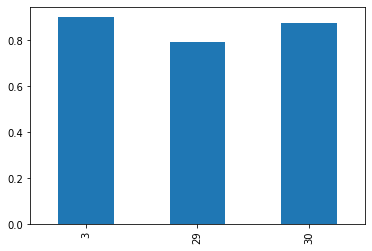

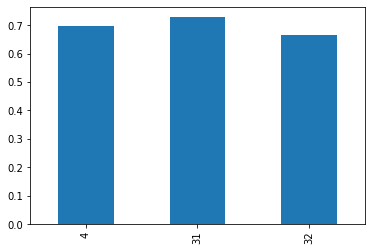

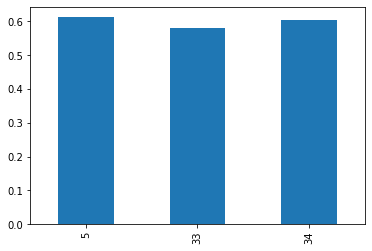

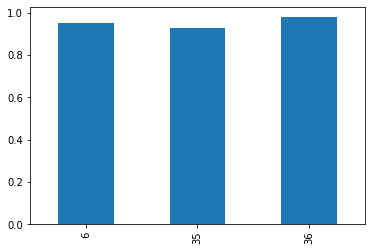

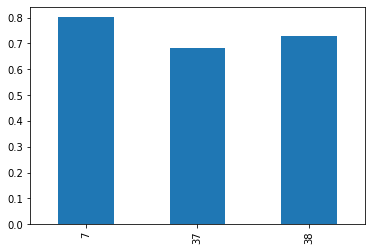

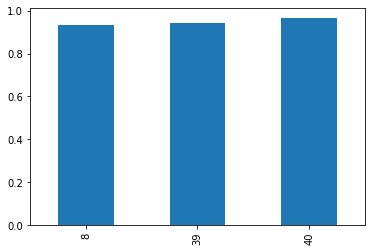

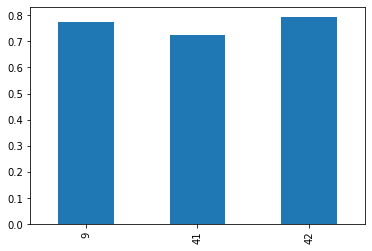

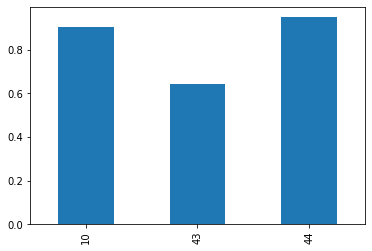

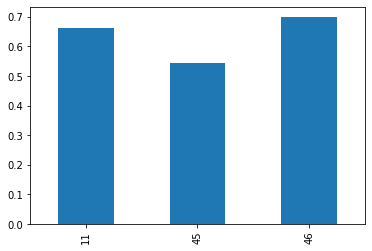

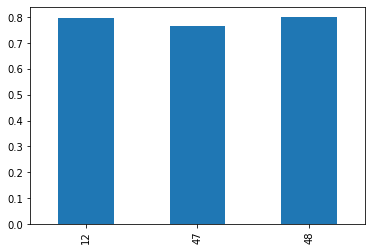

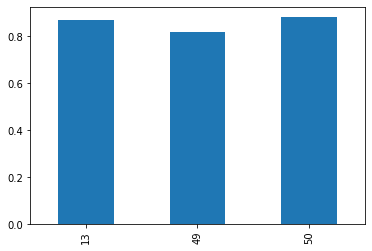

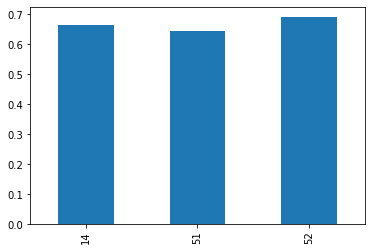

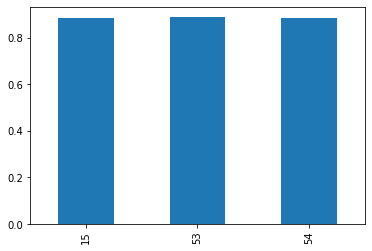

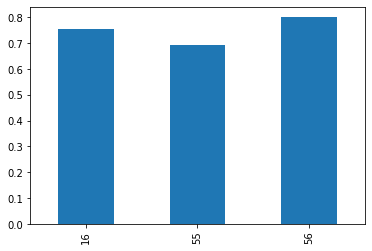

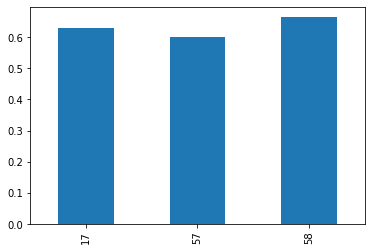

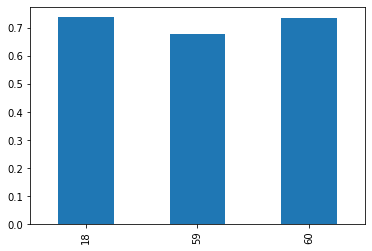

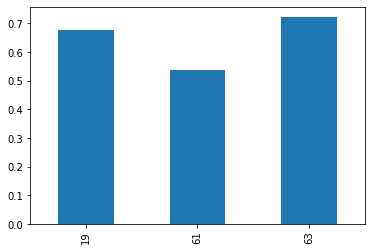

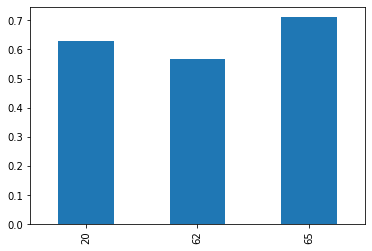

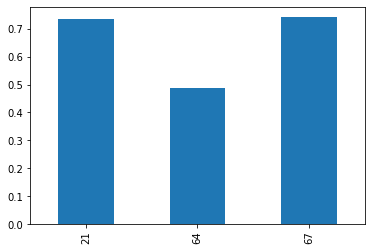

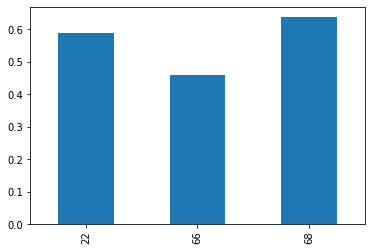

In [55]:
import matplotlib.pyplot as plt
for g in groups:
    g[2].plot(kind='bar')
    plt.show()

In [68]:
for e in experiments:
    print("| {} | {} | {} | {} | {} | {} |".format(
        INVERSE_CLASS_MAP[0],
        e[0],
        e[1],
        e[2],
        e[2] - baseline_auc[e[0]][e[1]],
        e[3]
    ))

| fan | 0 | 0 | 0.5639312039312039 | 0.019831203931203856 | 0.4959265485581275 |
| fan | 0 | 2 | 0.8054038997214485 | 0.07140389972144856 | 0.6094414308752383 |
| fan | 0 | 4 | 0.6660919540229884 | 0.049991954022988394 | 0.5412885662431942 |
| fan | 0 | 6 | 0.9021606648199446 | 0.16296066481994465 | 0.7100160373232249 |
| fan | 1 | 0 | 0.6967132867132866 | 0.025213286713286598 | 0.5395656974604344 |
| fan | 1 | 2 | 0.6124324324324325 | -0.002867567567567453 | 0.5770507349454718 |
| fan | 1 | 4 | 0.9497 | 0.06640000000000001 | 0.7931578947368421 |
| fan | 1 | 6 | 0.8018627450980392 | 0.1529627450980392 | 0.6068111455108359 |
| fan | 2 | 0 | 0.934185393258427 | -0.027714606741573 | 0.6991425192193969 |
| fan | 2 | 2 | 0.7753183520599252 | -0.014381647940074793 | 0.6069386950522373 |
| fan | 2 | 4 | 0.9043820224719101 | -0.03861797752808982 | 0.625665286812537 |
| fan | 2 | 6 | 0.6628089887640449 | -0.03309101123595504 | 0.4979302188054406 |
| fan | 3 | 1 | 0.7975541125541126 | -0.0160458

In [26]:
INVERSE_CLASS_MAP[0]

'fan'